# Merge and read csv_files

In [213]:
import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Path to your folder
folder_path = "../../csv_files"

# Find all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read and concatenate all CSVs into one DataFrame
df = pd.concat((pd.read_csv(file) for file in csv_files), ignore_index=True)

# Show the combined DataFrame
df = df[df["Experiment"] == "FR"]
df

,Name,Experiment,Trial,Sequence,Recall
141,julie,FR,1,a t v h q c x b j i g r o p u,o p u b i g x a t d n
142,julie,FR,2,r a x t n q z o c p e s m u f,p e s m u f x r a s p q d z
143,julie,FR,3,c n y d x e h u a j s i k r g,j s i g r x z e b c h s u
144,julie,FR,4,k m f h t q o l j z u y d r a,k m f h u d l y e g c n p a
145,julie,FR,1,m a r q f o y n x z p b i e u,m a r q p i e u n x f o y z s t
146,julie,FR,3,r y n h z t k q o j m b d x p,n y q k m b x z c t k p r s
147,julie,FR,4,a e i y s t x j u m k n d b o,n d b o a i e y j u m s t g h
148,julie,FR,5,y r c g j u o l s p k v z n h,p k v z n h u o g j k l
149,julie,FR,6,p e y a j z s k r b q o l d u,o l d u j k b z p e y a c
150,julie,FR,7,r s f h m o q j t e v p i d y,j t v p i y d h m q o


# Get positions and amount of correct recall

In [214]:
def add_position_and_correct_guesses(df, sequence_col="Sequence", recall_col="Recall"):
    # Helper function to get correct positions as a string
    def get_positions(row):
        s = row[sequence_col].split()
        r = row[recall_col].split()
        positions = []
        for i, word in enumerate(s):
            if word in r:
                positions.append(str(i))
        return " ".join(positions)

    # Add column with correct positions
    df["Position correct recall"] = df.apply(get_positions, axis=1)
    # Add column with amount of correct guesses
    df["Amount of correct guesses"] = df["Position correct recall"].apply(lambda x: len(x.split()))
    return df

df = add_position_and_correct_guesses(df)
df

,Name,Experiment,Trial,Sequence,Recall,Position correct recall,Amount of correct guesses
141,julie,FR,1,a t v h q c x b j i g r o p u,o p u b i g x a t d n,0 1 6 7 9 10 12 13 14,9
142,julie,FR,2,r a x t n q z o c p e s m u f,p e s m u f x r a s p q d z,0 1 2 5 6 9 10 11 12 13 14,11
143,julie,FR,3,c n y d x e h u a j s i k r g,j s i g r x z e b c h s u,0 4 5 6 7 9 10 11 13 14,10
144,julie,FR,4,k m f h t q o l j z u y d r a,k m f h u d l y e g c n p a,0 1 2 3 7 10 11 12 14,9
145,julie,FR,1,m a r q f o y n x z p b i e u,m a r q p i e u n x f o y z s t,0 1 2 3 4 5 6 7 8 9 10 12 13 14,14
146,julie,FR,3,r y n h z t k q o j m b d x p,n y q k m b x z c t k p r s,0 1 2 4 5 6 7 10 11 13 14,11
147,julie,FR,4,a e i y s t x j u m k n d b o,n d b o a i e y j u m s t g h,0 1 2 3 4 5 7 8 9 11 12 13 14,13
148,julie,FR,5,y r c g j u o l s p k v z n h,p k v z n h u o g j k l,3 4 5 6 7 9 10 11 12 13 14,11
149,julie,FR,6,p e y a j z s k r b q o l d u,o l d u j k b z p e y a c,0 1 2 3 4 5 7 9 11 12 13 14,12
150,julie,FR,7,r s f h m o q j t e v p i d y,j t v p i y d h m q o,3 4 5 6 7 8 10 11 12 13 14,11


# Primacy and recency effect

In [215]:
# Total amount of FR experiments done
amount_of_experiments = df.shape[0]
print("Amount of FR experiments:", amount_of_experiments)

# Combine the lists of the correct positions to 1 big list
all_correct_positions= []
for row in df["Position correct recall"]:
    row = row.split()
    all_correct_positions.extend(row)
all_correct_positions = [int(x) for x in all_correct_positions]

# Average correct
average_correct = len(all_correct_positions) / amount_of_experiments
print("Average ammount of correct per experiment:", average_correct)

# Count of correct guesses for each position
correct_per_position= [all_correct_positions.count(position) for position in range(15)]

# Percent correct at each position out of all experiments
position_correct_percent = [corrects/amount_of_experiments*100 for corrects in correct_per_position] 

Amount of FR experiments: 40
Average ammount of correct per experiment: 9.825


Text(0.5, 1.0, 'Standard Free Recall')

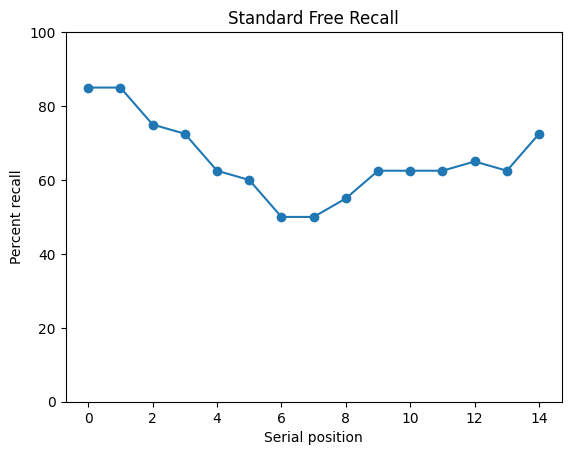

In [216]:
plt.plot(position_correct_percent, marker="o")
plt.xlabel("Serial position")
plt.ylim(0,100)
plt.ylabel("Percent recall")
plt.title("Standard Free Recall")

# Confidence Interval for amount of correct guesses

In [217]:
num_correct_in_experiments=df["Amount of correct guesses"].to_numpy()
num_correct_in_experiments

array([ 9, 11, 10,  9, 14, 11, 13, 11, 12, 11,  9, 11, 12, 11, 11, 14, 12,
       13,  9, 11,  7,  9, 11,  6,  9,  9, 10,  6,  7,  8, 10,  8, 10,  8,
        8,  6,  8,  8, 11, 10])

In [ ]:
x = num_correct_in_experiments
stats.t.interval(0.95, df = len(x)-1 , loc = x.mean(), scale = x.std(ddof=1)/np.sqrt(len(x)))

(np.float64(9.16166815162437), np.float64(10.488331848375628))

In [220]:
stats.ttest_1samp(x,popmean= np.mean(x)).confidence_interval(confidence_level=0.95)

ConfidenceInterval(low=np.float64(9.16166815162437), high=np.float64(10.488331848375628))

The mean of correct guesses for the Standard FR experiment is:

$[9.16 : 10.49]$